In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

import pybliss



In [3]:
data_loc = "/home/nathan/datasets/voyager_2020_data/"

In [4]:
!ls $data_loc

single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat
single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5
single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.log
single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.dat
single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5
single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.log
single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.dat
single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5
single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.log
single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.dat
single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5
single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.log
single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.dat
single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5
single_coarse_guppi_59046_81310_DIAG_VO

In [5]:

events = pybliss.io.read_events_from_file("../build/bliss/events_output")

print(len(events))

for e in events:
    print(e.hits)



14
[Hit with start_freq_MHz=8419.565430 (index=651993), drift_rate_Hz_per_second=-0.344394 (index=84) and SNR 1642.530029, Hit with start_freq_MHz=8419.565430 (index=651965), drift_rate_Hz_per_second=-0.353960 (index=85) and SNR 216.908142, Hit with start_freq_MHz=8419.565430 (index=651942), drift_rate_Hz_per_second=-0.392226 (index=89) and SNR 15.054782]
[Hit with start_freq_MHz=8419.542969 (index=659988), drift_rate_Hz_per_second=-0.344394 (index=84) and SNR 110864.921875, Hit with start_freq_MHz=8419.542969 (index=660074), drift_rate_Hz_per_second=-0.353960 (index=85) and SNR 12183.276367, Hit with start_freq_MHz=8419.541992 (index=660165), drift_rate_Hz_per_second=-0.411359 (index=91) and SNR 55691.289062]
[Hit with start_freq_MHz=8419.520508 (index=668097), drift_rate_Hz_per_second=-0.344394 (index=84) and SNR 1522.566284, Hit with start_freq_MHz=8419.520508 (index=668069), drift_rate_Hz_per_second=-0.353960 (index=85) and SNR 191.791672, Hit with start_freq_MHz=8419.520508 (index

In [7]:
cadence = pybliss.cadence([[f"{data_loc}/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5",
                    f"{data_loc}/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5",
                    f"{data_loc}/single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5"
                    ],
                    [f"{data_loc}/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5"],
                    [f"{data_loc}/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5"],
                    [f"{data_loc}/single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5"]])



In [8]:
print(cadence.observations[0].scans[0].fch1 + cadence.observations[0].scans[0].foff * cadence.observations[0].scans[0].nchans)
print(cadence.observations[0].scans[1].fch1)
print(cadence.observations[0].scans[2].fch1)

print(cadence.observations[1].scans[0].fch1)
print(cadence.observations[2].scans[0].fch1)



8418.45703125
8421.38671875
8421.38671875
8421.38671875
8421.38671875


8421.38671875
-2.7939677238464355e-06
8418.45703125
8421.38671875


Text(0.5, 0, 'Frequency [MHz]')

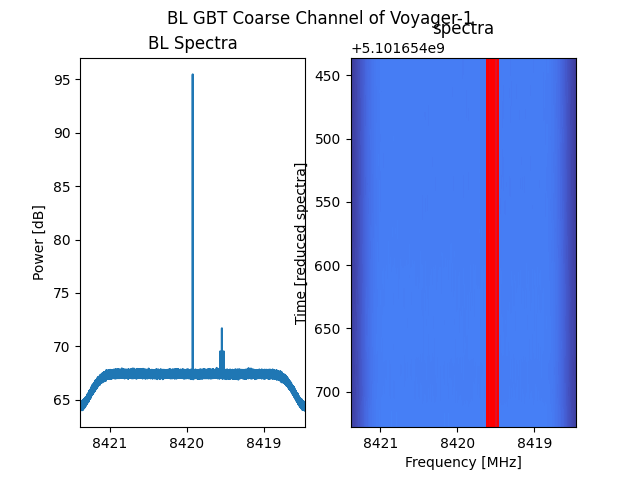

In [13]:
plot_scan = cadence.observations[0].scans[0]

fig, (axes) = plt.subplots(1, 2, sharex=True)
plt.suptitle("BL GBT Coarse Channel of Voyager-1")

fch1 = plot_scan.fch1
print(fch1)
foff = plot_scan.foff
print(foff)
nchans = plot_scan.nchans

plot_data = np.from_dlpack(plot_scan.data)

freqs = np.linspace(fch1, fch1 + foff * nchans, nchans)
print(np.min(freqs))
print(np.max(freqs))

axes[0].set_title("mean(spectra) down time")
axes[0].plot(freqs, 10* np.log10(plot_data.mean(0)))
axes[0].set_title("BL Spectra")
axes[0].set_ylabel("Power [dB]")
plt.margins(0)

start_time = plot_scan.tstart * 24 * 60 * 60
end_time = start_time + plot_scan.tsamp * plot_data.shape[0]
axes[1].set_title("spectra")
axes[1].imshow(10*np.log10(plot_data), aspect="auto", interpolation=None, cmap="turbo", extent=[freqs[0], freqs[-1], end_time, start_time])
axes[1].set_ylabel("Time [reduced spectra]")

for e in events:
    for h in e.hits:
        start_freq = h.start_freq_MHz
        end_freq = start_freq + (end_time-start_time) * h.drift_rate_Hz_per_sec * 1e-6

        # axes[1].axline((end_freq, end_time), (start_freq, start_time))
        axes[1].axline((start_freq, start_time), (end_freq, end_time), color="red")

plt.xlabel("Frequency [MHz]")



(2,)


NameError: name 'fil0' is not defined

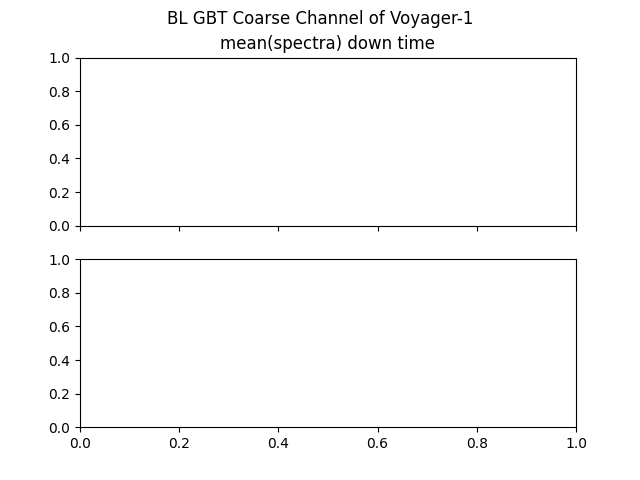

In [10]:

fig, (axes) = plt.subplots(2, 1, sharex=True)
plt.suptitle("BL GBT Coarse Channel of Voyager-1")

print(axes.shape)

axes[0].set_title("mean(spectra) down time")
axes[0].plot(freqs, 10* np.log10(fil0[:, :].mean(0)))
axes[0].set_title("BL Spectra")
axes[0].set_ylabel("Power [dB]")
plt.margins(0)

axes[1].set_title("spectra")
axes[1].imshow(10*np.log10(fil0[:, :]), aspect="auto", interpolation=None, cmap="turbo", extent=[freqs[0], freqs[-1], fil0.shape[0], 0])
axes[1].set_ylabel("Time [reduced spectra]")

plt.xlabel("Frequency [MHz]")


In [ ]:
voyager_expect = 660000

plot_lower_freq_index = voyager_expect-10000
plot_upper_freq_index = voyager_expect+10000

freqs = np.linspace(fch1 + foff * plot_lower_freq_index, fch1 + foff * plot_upper_freq_index, plot_upper_freq_index - plot_lower_freq_index)

fig, (axes) = plt.subplots(2, 1, sharex=True)
plt.suptitle("BL GBT Coarse Channel of Voyager-1")


print(axes.shape)

axes[0].set_title("mean(spectra) down time")
axes[0].plot(freqs, 10* np.log10(fil0[:, plot_lower_freq_index:plot_upper_freq_index].mean(0)))
axes[0].set_title("BL Spectra")
axes[0].set_ylabel("Power [dB]")
plt.margins(0)

axes[1].set_title("spectra")
axes[1].imshow(10*np.log10(fil0[:, plot_lower_freq_index:plot_upper_freq_index]), aspect="auto", interpolation=None, cmap="turbo", extent=[freqs[0], freqs[-1], fil0.shape[0], 0])
axes[1].set_ylabel("Time [reduced spectra]")

plt.xlabel("Frequency [MHz]")


In [ ]:
voyager_expect = 660000

plot_lower_freq_index = voyager_expect-10000
plot_upper_freq_index = voyager_expect+10000

freqs = np.linspace(fch1 + foff * plot_lower_freq_index, fch1 + foff * plot_upper_freq_index, plot_upper_freq_index - plot_lower_freq_index)
print(freqs)
# xticks = [fch1 + foff * plot_lower_freq_index, fch1 + foff * plot_upper_freq_index]

fig, (axes) = plt.subplots(3, 2, sharex=True)
plt.suptitle("Spectra of 3 ON scans of Voyager-1")

print(axes.shape)

axes[0,0].set_title("mean(spectra) down time")
axes[0,0].plot(freqs, np.log10(fil0[:, plot_lower_freq_index:plot_upper_freq_index].mean(0)/16))
plt.margins(0)

axes[0,1].set_title("spectra")
axes[0,1].imshow(np.log10(fil0[:, plot_lower_freq_index:plot_upper_freq_index]), aspect="auto", interpolation=None, cmap="turbo", extent=[freqs[0], freqs[-1], fil0.shape[0], 0])

axes[1,0].set_title("mean(spectra) down time")
axes[1,0].plot(freqs, fil1[:, plot_lower_freq_index:plot_upper_freq_index].mean(0))
plt.margins(0)

axes[1,1].set_title("spectra")
axes[1,1].imshow(fil1[:, plot_lower_freq_index:plot_upper_freq_index], aspect="auto", interpolation=None, cmap="turbo", extent=[freqs[0], freqs[-1], fil1.shape[0], 0])

axes[2,0].set_title("mean(spectra) down time")
axes[2,0].plot(freqs, fil2[:, plot_lower_freq_index:plot_upper_freq_index].mean(0))
plt.margins(0)

axes[2,1].set_title("spectra")
axes[2,1].imshow(fil2[:, plot_lower_freq_index:plot_upper_freq_index], aspect="auto", interpolation=None, cmap="turbo", extent=[freqs[0], freqs[-1], fil2.shape[0], 0])

# 8419.54296875

In [ ]:
SNR is 50.467 dB with center 8419.54304 @ drift rate -0.49107980728149414 consists of 3 hits
SNR is 32.337 dB with center 8419.520512 @ drift rate -0.48470214009284973 consists of 3 hits
SNR is 31.294 dB with center 8419.565568 @ drift rate -0.48789098858833313 consists of 3 hits
SNR is 28.281 dB with center 8419.565568 @ drift rate -0.5405066609382629 consists of 2 hits
SNR is 16.819 dB with center 8419.564544 @ drift rate -0.5405066609382629 consists of 2 hits
SNR is 16.514 dB with center 8419.519488 @ drift rate -0.545289933681488 consists of 2 hits
SNR is 16.367 dB with center 8419.474432 @ drift rate -0.4831077456474304 consists of 2 hits
SNR is 16.182 dB with center 8419.475456 @ drift rate -0.5309401750564575 consists of 2 hits
SNR is 15.810 dB with center 8419.520512 @ drift rate -0.5261569619178772 consists of 2 hits
SNR is 15.787 dB with center 8419.610112 @ drift rate -0.49267423152923584 consists of 2 hits
SNR is 15.075 dB with center 8419.610112 @ drift rate -0.5070239901542664 consists of 2 hits
SNR is 14.009 dB with center 8419.475456 @ drift rate -0.612255334854126 consists of 2 hits
SNR is 13.775 dB with center 8419.610112 @ drift rate -0.29656118154525757 consists of 2 hits
SNR is 13.202 dB with center 8419.610112 @ drift rate -0.306127667427063 consists of 2 hits
SNR is 12.148 dB with center 8419.610112 @ drift rate -0.3204774260520935 consists of 2 hits
SNR is 12.118 dB with center 8419.474432 @ drift rate 0.5070239305496216 consists of 2 hits
SNR is 12.117 dB with center 8419.610112 @ drift rate 0.5118072032928467 consists of 2 hits
SNR is 12.049 dB with center 8419.610112 @ drift rate 0.5213737487792969 consists of 2 hits
SNR is 12.028 dB with center 8419.610112 @ drift rate -0.4783244729042053 consists of 2 hits
SNR is 11.930 dB with center 8419.610112 @ drift rate -0.3156941533088684 consists of 2 hits
SNR is 11.922 dB with center 8419.610112 @ drift rate 0.07653191685676575 consists of 2 hits

In [ ]:
scans = [
    {
        "start_time": data_fil0['data'].attrs["tstart"] * 24 * 60 * 60,
        "end_time": data_fil0['data'].attrs["tstart"] * 24 * 60 * 60 + data_fil0['data'].attrs["tsamp"]*16,
        "start_freq": 8419.54273075*1e6,
        "end_freq": 8419.54263022*1e6,
        # "start_freq": 8419.54273208*1e6,
        # "end_freq": 8419.54263178*1e6,
     },
    {
        "start_time": data_fil1['data'].attrs["tstart"] * 24 * 60 * 60,
        "end_time": data_fil1['data'].attrs["tstart"] * 24 * 60 * 60 + data_fil1['data'].attrs["tsamp"]*16,
        "start_freq": 8419.54249201*1e6,
        "end_freq": 8419.54238287*1e6,
     },
    # {
    #     "start_time": data_fil2['data'].attrs["tstart"] * 24 * 60 * 60,
    #     "end_time": data_fil2['data'].attrs["tstart"] * 24 * 60 * 60 + data_fil2['data'].attrs["tsamp"]*16,
    #     "start_freq":0,
    #     "end_freq":0,
    #  }

]

In [ ]:

scans[0]["drift_rate"] = (scans[0]["end_freq"] - scans[0]["start_freq"]) / (scans[0]["end_time"] - scans[0]["start_time"])
print(f"scan 0 travels {scans[0]['end_freq'] - scans[0]['start_freq']} for a drift rate of {scans[0]['drift_rate']}")

scans[1]["drift_rate"] = (scans[1]["end_freq"] - scans[1]["start_freq"]) / (scans[1]["end_time"] - scans[1]["start_time"])
print(f"scan 1 travels {scans[1]['end_freq'] - scans[1]['start_freq']} for a drift rate of {scans[1]['drift_rate']}")


overall_drift_rate = (scans[1]['end_freq']-scans[0]['start_freq']) / (scans[1]['end_time'] - scans[0]['start_time'])

print(f"drift over the entire duration ({scans[1]['end_freq']-scans[0]['start_freq']} / {scans[1]['end_time'] - scans[0]['start_time']}) is {overall_drift_rate}")


In [ ]:
# Extrapolate scan1, what frequency would it cross if 

scan1_extrapolated_to_start = scans[1]['start_freq'] + scans[1]['drift_rate'] * (scans[0]['start_time'] - scans[1]['start_time'])
print(scan1_extrapolated_to_start - scans[0]['start_freq'])


In [ ]:
# Extrapolate scan 0 to the start of scan 1
scan0_extrapolated_to_start_of_scan1 = scans[0]['start_freq'] + scans[0]['drift_rate'] * (scans[1]['start_time'] - scans[0]['start_time'])
print(scan0_extrapolated_to_start_of_scan1 - scans[1]['start_freq'])

scan0_extrapolated_to_start_of_scan1 = scans[0]['end_freq'] + scans[0]['drift_rate'] * (scans[1]['start_time'] - scans[0]['end_time'])
print(scan0_extrapolated_to_start_of_scan1 - scans[1]['start_freq'])


In [ ]:
midpoint_time = (scans[0]['start_time'] + scans[1]['end_time']) / 2
print(f"time in the middle is : {midpoint_time}")

scan0_extrapolated_to_mp = scans[0]['start_freq'] + scans[0]['drift_rate'] * (midpoint_time - scans[0]['start_time'])
scan1_extrapolated_to_mp = scans[1]['start_freq'] + scans[1]['drift_rate'] * (midpoint_time - scans[1]['start_time'])

print(scan1_extrapolated_to_mp - scan0_extrapolated_to_mp)

scan0_extrapolated_to_mp = scans[0]['start_freq'] + overall_drift_rate * (midpoint_time - scans[0]['start_time'])
scan1_extrapolated_to_mp = scans[1]['start_freq'] + overall_drift_rate * (midpoint_time - scans[1]['start_time'])

print(scan1_extrapolated_to_mp - scan0_extrapolated_to_mp)
